In [2]:
import pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
from numpy.linalg import inv

import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt from scipy.spatial.distance

# create multivariate distribution
# generate points along axis
x = np.linspace(-2,2,400)
y_axis = np.linspace(-2,2,400)
W = [-1.3,0.5]
eps = np.random.normal(0,0.3,[400,1])
y_results = W[0]*x + W[1] 
for i in range(len(y_results)):
    y_results[i] = y_results[i] + eps[i]


# print(y)

plt.scatter(x,y_results)

plt.show()

<Figure size 640x480 with 1 Axes>

2


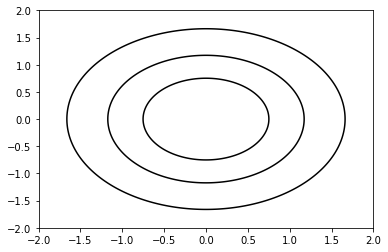

In [3]:
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

mu = np.array([0,0])
print(mu.size)
cov = np.eye(2)

# create multivariate distribution
pdf = multivariate_normal(mu,cov) # generate points along axis

x = np.linspace(-2,2,400)
y = np.linspace(-2,2,400)

x1p,x2p = np.meshgrid(x,y)
pos = np.vstack((x1p.flatten(),x2p.flatten()))
pos = pos.T

# evaluate pdf at points
Z = pdf.pdf(pos)
Z = Z.reshape(400,400)

fig = plt.figure()
ax = fig.gca()
pdf_c = ax.contour(x1p,x2p,Z,3,colors='k')

plt.show();

In [4]:
def nDataModel(n):
    randomIndex = []
    X = np.ones((n,2))
    
    Y = np.ones(n)
    
    for i in range(0,n):
        
        X[i,0] = x[i]
        
        Y[i] = y_results[i]
    
    
    m_0 = mu
    s_0 = cov

    #print(Y)
    
    beta = 0.3
    s_n = inv(inv(s_0) + beta*np.matmul(X.T,X))

    m_n = np.matmul(s_n,((np.matmul(inv(s_0),m_0))+beta * np.matmul(X.T,Y)))
    
    posterior = multivariate_normal(m_n,s_n)


    Z1 = posterior.pdf(pos)
    Z1 = Z1.reshape(400,400)

    plt.contour(x1p,x2p,Z1,3,colors='red')
    plt.show()
    return (m_n, s_n)
       

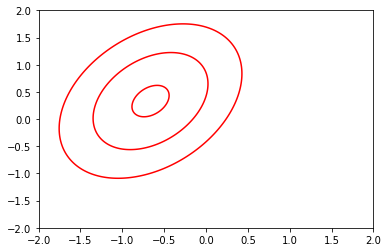

In [5]:
#posterior for 1 random point

m_n_1, s_n_1  = nDataModel(1)




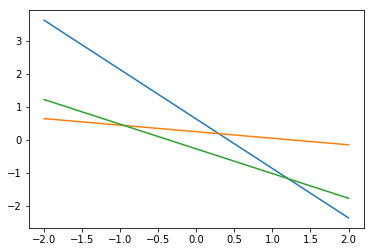

In [6]:

#samples from the 1 point posterior
def sample_n_points(m_n, s_n, n):
    lines = []
    sample = np.random.multivariate_normal(m_n,s_n,n)
    

   
    
    for i in range(0,n):
        lines.append(sample[i][0]*x + sample[i][1])
        plt.plot(x, lines[i])
        
        
    
    

    

    plt.show();


    
    
        
sample_n_points(m_n_1,s_n_1,3)        
    
    
    

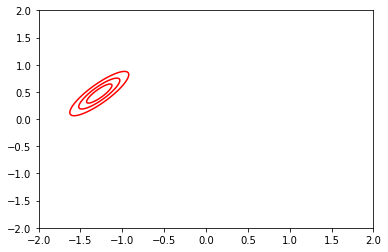

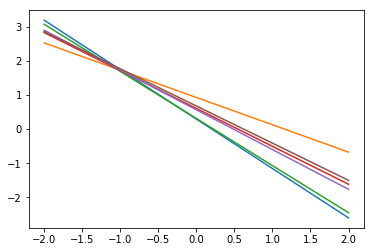

In [7]:
m_n_100, s_n_100 = nDataModel(199)


sample_n_points(m_n_100,s_n_100,6)

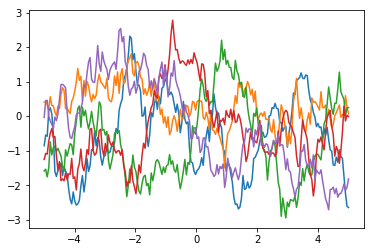

In [8]:
#QUESTION 13
x1 = np.linspace(-5,5,200)
x1 = x1.reshape(-1,1)
mu1 = np.zeros(x1.shape)

# compute covariance matrix
K1 = np.exp(-cdist(x1,x1,'euclidean'))
# now we have the mean function and the covariance function # the GP is fully described
f1 = np.random.multivariate_normal(mu1.flatten(),K1,5)
# plot the data
plt.plot(x1,f1.T)
plt.show()





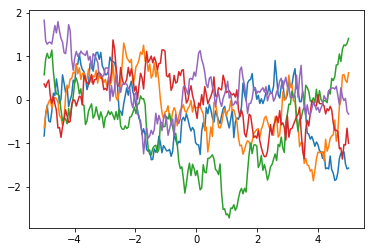

In [9]:
x2 = np.linspace(-5,5,200)
x2 = x2.reshape(-1,1)
mu2 = np.zeros(x2.shape)

# compute covariance matrix
K2 = np.exp(-cdist(x2,x2,'euclidean')/2)
# now we have the mean function and the covariance function # the GP is fully described
f2 = np.random.multivariate_normal(mu2.flatten(),K2,5)
# plot the data
plt.plot(x2,f2.T)
plt.show()




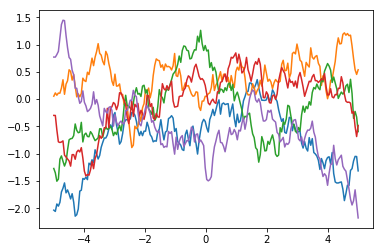

In [10]:
x3 = np.linspace(-5,5,200)
x3 = x3.reshape(-1,1)
mu3 = np.zeros(x3.shape)

# compute covariance matrix
K3 = np.exp(-cdist(x3,x3,'euclidean')/5)
# now we have the mean function and the covariance function # the GP is fully described
f3 = np.random.multivariate_normal(mu3.flatten(),K3,5)
# plot the data
plt.plot(x3,f3.T)
plt.show()

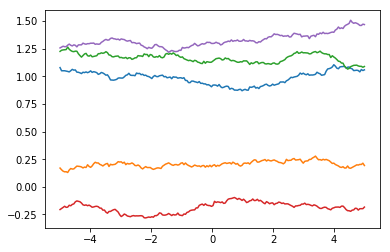

In [11]:
x4 = np.linspace(-5,5,200)
x4 = x4.reshape(-1,1)
mu4 = np.zeros(x4.shape)

# compute covariance matrix
K4 = np.exp(-cdist(x4,x4,'euclidean')/1000)
# now we have the mean function and the covariance function # the GP is fully described
f4 = np.random.multivariate_normal(mu4.flatten(),K4,5)
# plot the data
plt.plot(x4,f4.T)
plt.show()

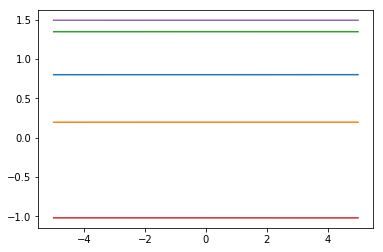

In [12]:
x5 = np.linspace(-5,5,200)
x5 = x5.reshape(-1,1)

mu5 = np.zeros(x5.shape)

# compute covariance matrix
K5 = np.exp(-cdist(x5,x5,'euclidean')/100000000)
# now we have the mean function and the covariance function # the GP is fully described
f5 = np.random.multivariate_normal(mu3.flatten(),K5,5)
# plot the data
plt.plot(x5,f5.T)
plt.show()

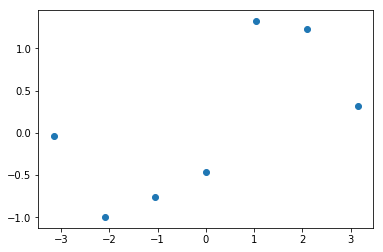

In [16]:
#QUESTION 14
import math

x_final = np.linspace(-(math.pi),math.pi,7)
# y2_axis = np.linspace(-1,1,7)
eps2 = np.random.normal(0,0.5,[7,1])
y_results_final = list(map(math.sin, x_final))


# mu_final = mu1.flatten()
# cov_final = K1

y2 = np.linspace(-1,1,7)

x1p_final,x2p_final = np.meshgrid(x2,y2)
pos_final = np.vstack((x1p_final.flatten(),x2p_final.flatten()))
pos_final = pos_final.T

# print(y_results2)
for i in range(len(y_results_final)):
    y_results_final[i] = y_results_final[i] + eps2[i]


plt.scatter(x_final,y_results_final)
plt.show()

# yi = sin(xi) + εi (7) 
# x = [−π,...,π]T (8) 
# εi ∼N(0,0.5), (9)
# print(x2)

# sample_n_points(m_n2_100,s_n2_100,6)



In [131]:
# x_train = np.array([-10,-8,5,-1,2])
# x_train = x_train.reshape(-1,1)
# def straight_line(m , x , c):
#     y = 5*x + c
#     return y
# ytrain = straight_line(5 , x_train , 0)

# mean_function = np.dot(np.dot(K_pt ,np.linalg.inv(K_train)), ytrain)

# covariance_function = K_prior - np.dot(np.dot(K_pt ,np.linalg.inv(K_train)) , K_tp) 

# f = np.random.multivariate_normal(mean_function[:,0],covariance_function , 100)
x_final = x_final.reshape(-1,1)
# print(x_final)
# print(x)
mean0 = (np.exp(-cdist(x_final,x1,'euclidean')/1)).T
mean1 = np.exp(-cdist(x1,x1,'euclidean')/1)
# # print(mean1.reshape(200,7).shape)
# mean1 = np.arange(40000).reshape(200,7)

cov1 = np.exp(-cdist(x_final,x_final,'euclidean')/1)
cov2 = np.exp(-cdist(x_final,x,'euclidean')/1).T
cov3 = inv(np.exp(-cdist(x,x,'euclidean')/1))
cov4 = np.exp(-cdist(x,x_final,'euclidean')/1)

# print(cov1,cov2,cov3,cov4)
mean = np.matmul(np.matmul(mean0, mean1), f)
cov = cov1 - np.matmul(np.matmul(cov2,cov3),cov4)

# print(cov)

# N(k(x∗,X)TK(X,X)−1f,
# k(x∗, x∗) − k(x∗, X)TK(X, X)−1K(X, x∗))

f_final = np.random.multivariate_normal(mean.flatten(),cov,5)
# plot the data
plt.plot(x_final,f_final.T)
plt.show()


ValueError: shapes (200,200) and (5,200) not aligned: 200 (dim 1) != 5 (dim 0)